## Perceptron Learning in Python - Basis for Neural Networks

### with learning visualization

In [1]:
import numpy as np
import scipy as sc
import numpy.random
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import random
from pylab import meshgrid
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

Let us create some artificial data with 2 classes - red and green.

In [2]:
# X
x1 = [0,1,2,3,-2,5]
# can be seen as y in 2D
x2 = [2,0,2,-1,-2,-1]
# target 
y = [1,1,1,0,0,0]
colors = ["green","green","green","red","red","red"]

In [3]:
x1[2:4]

[2, 3]

Let's plot the points.

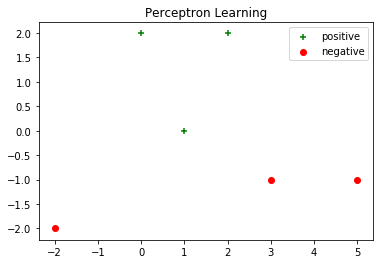

In [4]:
plt.scatter(x1[0:3],x2[0:3], c="green", marker="+", label="positive")
plt.scatter(x1[3:6],x2[3:6], c="red", marker="o", label="negative")
plt.legend(loc='best')
plt.title("Perceptron Learning")
plt.show()

Set initial weights.

In [5]:
#w1 = round(random.uniform(1,2), 2)
#w2 = round(random.uniform(1,2), 2)
#w3 = round(random.uniform(1,2), 2)
W = np.array([1,1])
W

array([1, 1])

Set learning rate alpha.

In [6]:
alpha = 0.5

Plot initial decision line.

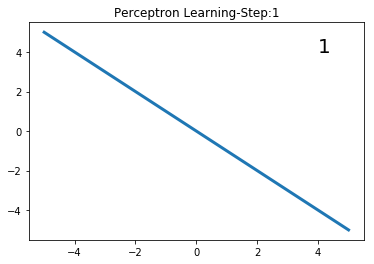

In [7]:
# evaluation function if point lies on decision boundary- y=f(x)
def decision_line_func(weights,px,py):
    return weights[0]*px + weights[1]*py == 0.0

def plot_decision_line(W, step):
    # get max and min of X
    #maxX = max(max(x1),max(x2))
    #minX = min(min(x1),min(x2))
    
    # returns list of points that lie on decision boundary
    line_x1 = np.arange(-6, 6, 1)#range(-10,10)
    line_x2 = np.arange(-6, 6, 1)
    # grid of points
    X1,X2 = meshgrid(line_x1, line_x2) 
    # evaluation of the function on the grid
    mask = decision_line_func(W,X1, X2) 
    #print(X1[mask])

    # plot decision line
    plt.plot(X1[mask],X2[mask], label='Decision line', linewidth=3)
    plt.title("Perceptron Learning-Step:" + str(step))
    plt.text(4, 4, str(step), fontsize=20)
    
    
plot_decision_line([1,1],1)

Plot points and decision line.

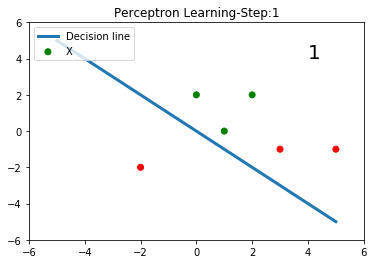

In [8]:
#plt.plot(X[mask], Y[mask], label='Decision line')
def plot_points_and_decision_line(weights,x,y,c, step):
    plot_decision_line(weights,step)
    plt.scatter(x, y, label='X', c=colors)
    plt.legend(loc=2)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.show()
    
plot_points_and_decision_line(W,x1,x2,colors,1)

As you can see, one point(the most right one) is wrongly classified. It is classified as 1 but should be 0.

In [9]:
# evaluation function - y=f(x)
def predict(weights,x1,x2):
    return 1 if weights[0]*x1 + weights[1]*x2 > 0 else 0

In [10]:
# reset weights
W = np.array([1,1])
alpha=0.5

Perceptron algorithm.

oldWeight: [1 1] newWeight: [-0.5  1.5]


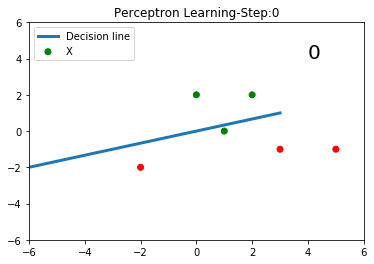

oldWeight: [-0.5  1.5] newWeight: [0.  1.5]


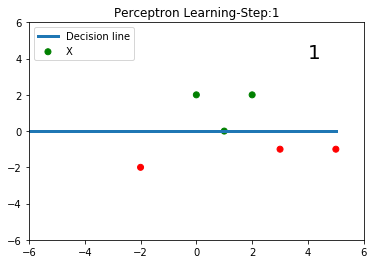

oldWeight: [0.  1.5] newWeight: [0.5 1.5]


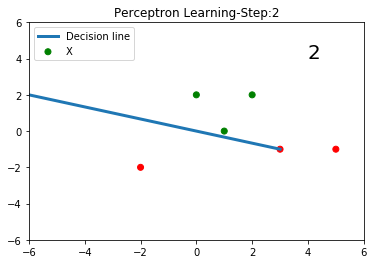

oldWeight: [0.5 1.5] newWeight: [-2.  2.]


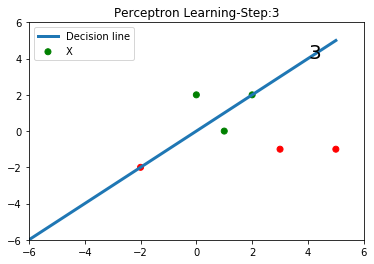

oldWeight: [-2.  2.] newWeight: [-1.5  2. ]


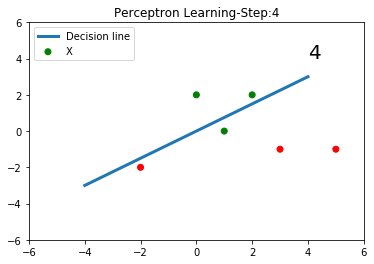

oldWeight: [-1.5  2. ] newWeight: [-1.  2.]


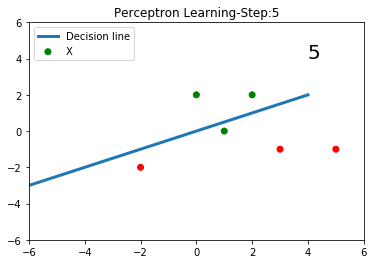

oldWeight: [-1.  2.] newWeight: [-0.5  2. ]


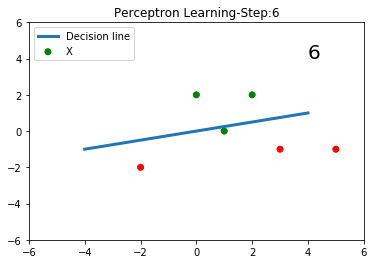

oldWeight: [-0.5  2. ] newWeight: [0. 2.]


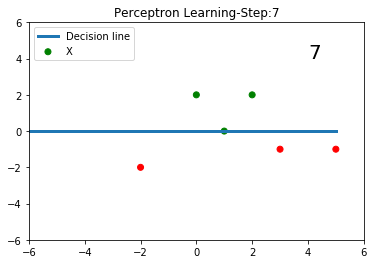

oldWeight: [0. 2.] newWeight: [0.5 2. ]


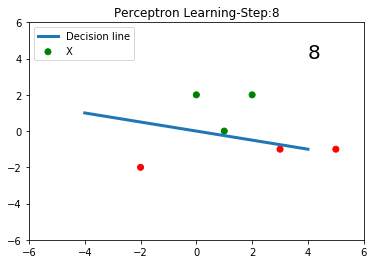

oldWeight: [0.5 2. ] newWeight: [-2.   2.5]


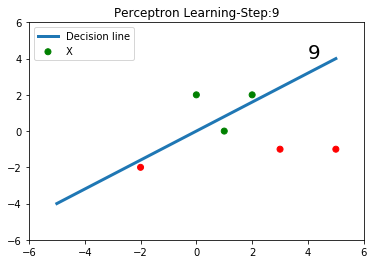

oldWeight: [-2.   2.5] newWeight: [-1.5  2.5]


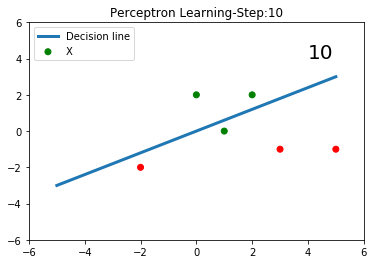

oldWeight: [-1.5  2.5] newWeight: [-1.   2.5]


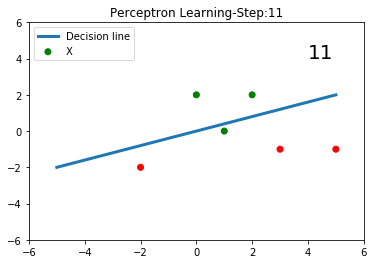

oldWeight: [-1.   2.5] newWeight: [-0.5  2.5]


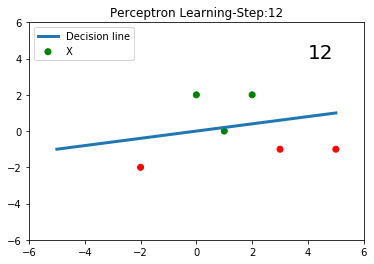

oldWeight: [-0.5  2.5] newWeight: [0.  2.5]


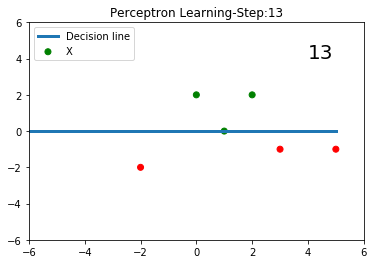

oldWeight: [0.  2.5] newWeight: [0.5 2.5]


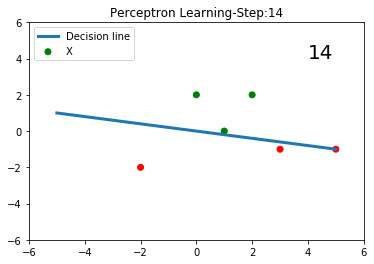

In [11]:
wrong_prediction = True
step = 0
while wrong_prediction == True:
    # set as false
    wrong_prediction = False
    # for every point in data
    for point_index in range(0,len(x1)):
        #print(point_index)
        px = x1[point_index]
        py = x2[point_index]
        target_class = y[point_index]

        # make prediction
        y_predicted = predict(W, px,py)
        # if prediction not correct-> compute new perceptron weights
        if y_predicted != target_class:
            # set that at least one point is wrongly classified
            wrong_prediction = True
            #print(y_predicted,target_class)
            # weights recomputation
            newW = np.asarray(W) + alpha * (target_class-y_predicted)*np.asarray([px,py])
            print("oldWeight:", W, "newWeight:",newW)
            W = newW
            plot_points_and_decision_line(newW,x1,x2,colors,step)
            # increase step
            step = step+1
        

In [17]:
# final weights
W

array([0.5, 2.5])

Now you can make predictive classification on you points with: 

In [18]:
px * W[0] + py *W[1]

0.0

For example, point A with (2,-4)

In [19]:
predict(W,2,-4)

0

Point A is classified as 0